<a href="https://colab.research.google.com/github/bytewithpalak/Polymer-Classification-using-ML/blob/main/Polymer_Classification_prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")


In [60]:
df= pd.read_csv('/content/polymers_dataset.csv')

In [61]:
df.head()


,Unnamed: 0,smiles,label,0,1,2,3,4,5,6,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,C(Cl)CCC(c1ccccc1)CCC(Cl)C,plastic,0,1,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,OC(=O)[C@]([H])(CC1=CC=C(O)C=C1)NC(=O)[C@]([H]...,peptide,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,O[C@]([C@@]([H])(CO)O[C@@](O)([H])[C@]([H])1O)...,oligosaccharide,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,C(Cl)CCC(c1ccccc1)C(Cl)CCC,plastic,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,CCC(Cl)CC(Cl)CCCC(C)CCC(c1ccccc1),plastic,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Columns: 2051 entries, Unnamed: 0 to 2047
dtypes: float64(1587), int64(462), object(2)
memory usage: 30.6+ MB


In [63]:
df.isnull().sum()

,0
Unnamed: 0,0
smiles,0
label,0
0,0
1,0
...,...
2043,1
2044,1
2045,1
2046,1


In [64]:
print("Shape of Dataset:",df.shape)

Shape of Dataset: (1958, 2051)


In [65]:
print("Columns of Dataset:",df.columns)

Columns of Dataset: Index(['Unnamed: 0', 'smiles', 'label', '0', '1', '2', '3', '4', '5', '6',
       ...
       '2038', '2039', '2040', '2041', '2042', '2043', '2044', '2045', '2046',
       '2047'],
      dtype='object', length=2051)


In [66]:
 df.drop(columns=['Unnamed: 0'],inplace=True)

In [67]:
print(df.shape)


(1958, 2050)


In [68]:
X=df.drop(columns=['label','smiles'])
y=df['label']

In [69]:
X.shape

(1958, 2048)

In [70]:
y.shape

(1958,)

In [71]:
y

,label
0,plastic
1,peptide
2,oligosaccharide
3,plastic
4,plastic
...,...
1953,peptide
1954,oligosaccharide
1955,oligosaccharide
1956,peptide


In [72]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.4, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
print("Training data shape:", X_train.shape)

Training data shape: (1174, 2048)


In [75]:
print("Testing data shape:", X_test.shape)

Testing data shape: (784, 2048)


RANDOM FOREST CLASSIFIER


In [76]:
model= RandomForestClassifier(n_estimators=100, random_state=42)

In [77]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [78]:
y_pred=model.predict(X_test)

In [79]:
y_pred

array([1, 2, 0, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0, 1, 0, 0, 2, 2, 1, 2, 2, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 2, 2, 0, 2, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 1, 1, 2, 0, 0, 2, 0, 1, 2, 1, 2,
       1, 2, 1, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1, 1, 2, 0, 0, 0, 1, 2, 0, 2, 0,
       1, 0, 1, 1, 2, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2,
       1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 2, 2, 0,
       0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2, 2, 2,
       2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 0, 2,
       1, 2, 0, 2, 2, 1, 1, 0, 1, 2, 0, 0, 1, 2, 1, 1, 0, 1, 1, 0, 0, 2,
       1, 2, 2, 2, 0, 2, 1, 0, 2, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 0, 2, 1,
       0, 0, 2, 1, 1, 0, 0, 1, 0, 2, 0, 2, 2, 2, 1,

In [80]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc,4))

Accuracy: 1.0


In [81]:
print ("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       269
           1       1.00      1.00      1.00       249
           2       1.00      1.00      1.00       266

    accuracy                           1.00       784
   macro avg       1.00      1.00      1.00       784
weighted avg       1.00      1.00      1.00       784



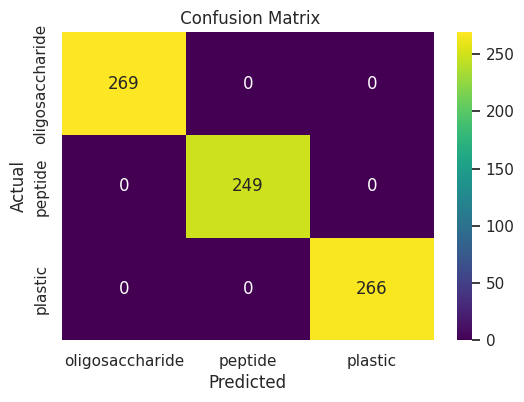

In [82]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(" Confusion Matrix")
plt.show()

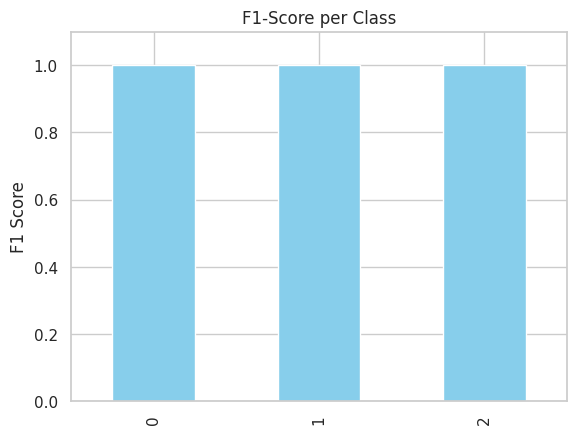

In [83]:
report = classification_report(y_test, y_pred, output_dict=True)


report_df = pd.DataFrame(report).transpose()


report_df.iloc[:-3]["f1-score"].plot(kind='bar', color='skyblue')
plt.title("F1-Score per Class")
plt.ylabel("F1 Score")
plt.ylim(0, 1.1)
plt.grid(True)
plt.show()

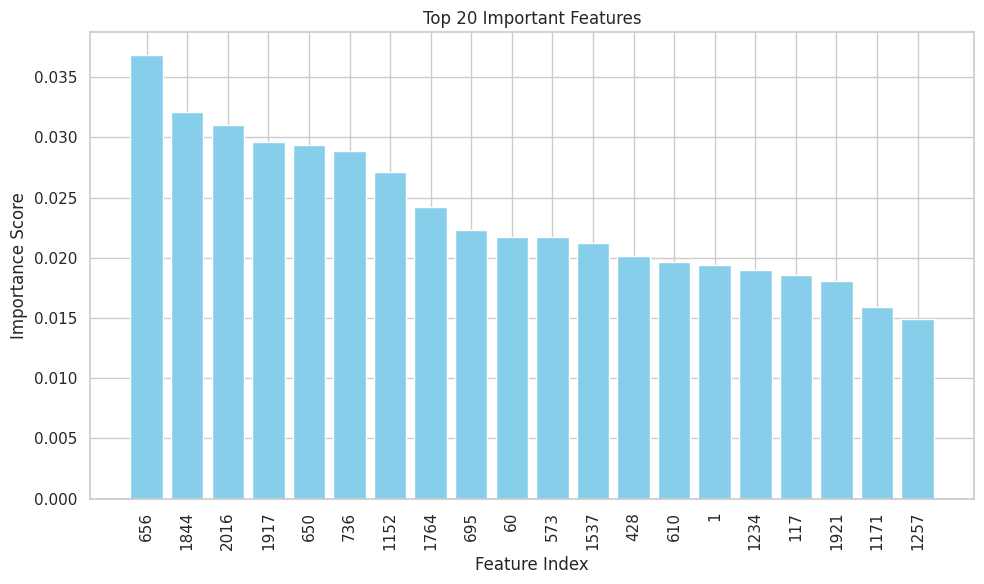

In [84]:
importances = model.feature_importances_

indices = np.argsort(importances)[::-1][:20]


plt.figure(figsize=(10, 6))
plt.bar(range(len(indices)), importances[indices], color='skyblue')
plt.xticks(range(len(indices)), indices, rotation=90)
plt.title("Top 20 Important Features")
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

 KNN



In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)



ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
y_pred

In [ ]:
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_knn, output_dict=True)


report_df = pd.DataFrame(report).transpose()


report_df.iloc[:-3]["f1-score"].plot(kind='bar', color='pink')
plt.title("F1-Score per Class")
plt.ylabel("F1 Score")
plt.ylim(0, 1.1)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.svm import SVC

svm= SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm=svm.predict(X_test)

In [ ]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Reds',
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
!pip install xgboost

In [ ]:
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42)
import xgboost as xgb
xgb_model= xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train_encoded)
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("XGBoost Accuracy:", accuracy_score(y_test_encoded, y_pred_xgb))
print("\nXGBoost Classification Report:\n", classification_report(y_test_encoded, y_pred_xgb))


In [ ]:
cm_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)

plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='flare',
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
importances = xgb_model.feature_importances_

indices = np.argsort(importances)[::-1][:20]


plt.figure(figsize=(10, 6))
plt.bar(range(len(indices)), importances[indices], color='skyblue')
plt.xticks(range(len(indices)), indices, rotation=90)
plt.title("Top 20 Important Features")
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

In [ ]:


results = {
    "Model": ["Random Forest", "KNN", "SVM", "XGBoost"],
    "Accuracy": [1.00, 0.975, 1.00, 1.00],
    "Notes": [
        "Perfect accuracy, interpretable",
        "Slightly lower, distance-based",
        "Perfect accuracy, clean margin",
        "Perfect accuracy, fast + scalable"
    ]
}

df_results = pd.DataFrame(results)
df_results


In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=df_results, palette='coolwarm')
plt.ylim(0.95, 1.01)
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy Score")
plt.xlabel("Machine Learning Model")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:

!pip install streamlit joblib

code = """
import streamlit as st
import pandas as pd
import joblib

# Load saved model and tools
model = joblib.load("polymer_rf_model.pkl")
scaler = joblib.load("scaler.pkl")
le = joblib.load("label_encoder.pkl")

st.title("🔬 Polymer Type Classifier")

uploaded_file = st.file_uploader("Upload your polymer CSV file", type=["csv"])

if uploaded_file:
    df = pd.read_csv(uploaded_file)
    st.subheader("📄 Input Data")
    st.write(df.head())

    # Preprocess uploaded data
    X_new = df.drop(columns=["smiles"], errors="ignore")
    X_scaled = scaler.transform(X_new)

    # Make predictions
    y_pred = model.predict(X_scaled)
    y_label = le.inverse_transform(y_pred)

    st.subheader("🧪 Predicted Polymer Types")
    st.write(pd.DataFrame(y_label, columns=["Predicted Type"]))
"""

with open("app.py", "w") as f:
    f.write(code)

print("✅ app.py file created!")
